In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  s

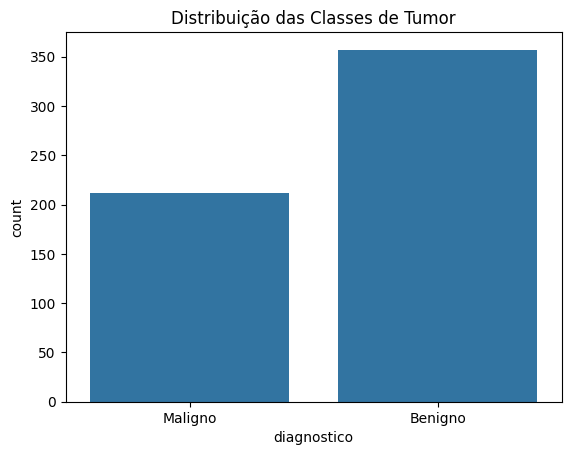

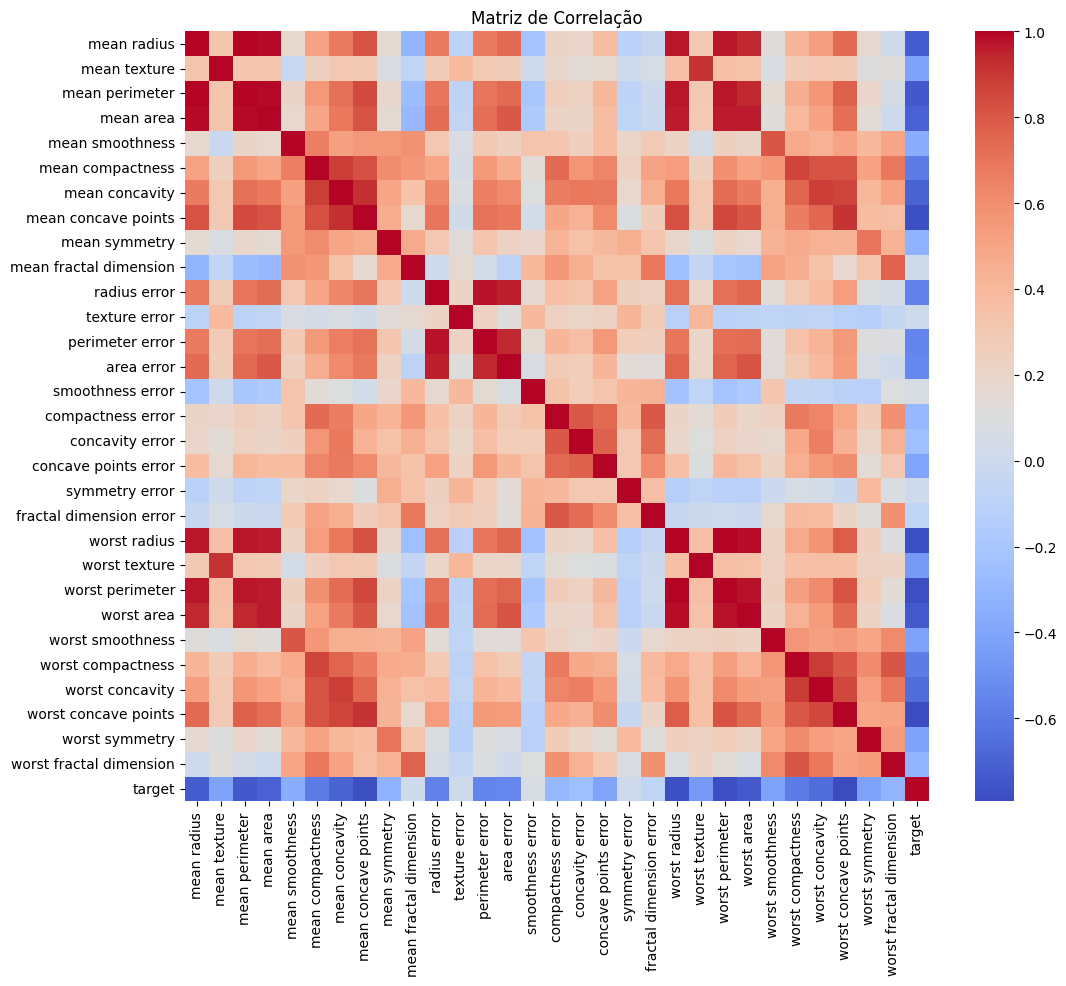

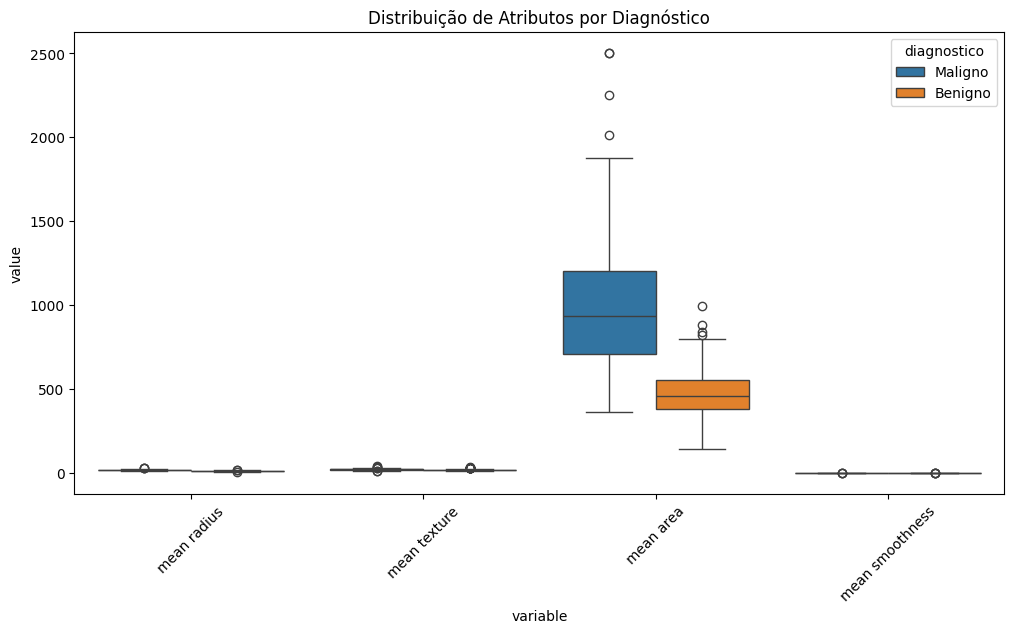

In [4]:

# Carregar o dataset
dados = load_breast_cancer()
df = pd.DataFrame(dados.data, columns=dados.feature_names)
df['target'] = dados.target

# Mapear os rótulos
df['diagnostico'] = df['target'].map({0: 'Maligno', 1: 'Benigno'})

# Exibir informações básicas
print("\nInformações do dataset:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe().T)

print("\nContagem de classes:")
print(df['diagnostico'].value_counts())

# Gráfico da distribuição das classes
sns.countplot(x='diagnostico', data=df)
plt.title('Distribuição das Classes de Tumor')
plt.show()

# Matriz de correlação das principais variáveis
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Boxplot de algumas variáveis importantes
atributos = ['mean radius', 'mean texture', 'mean area', 'mean smoothness']
df_melt = df.melt(id_vars='diagnostico', value_vars=atributos)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melt, x='variable', y='value', hue='diagnostico')
plt.title('Distribuição de Atributos por Diagnóstico')
plt.xticks(rotation=45)
plt.show()


In [5]:

X = df.drop(['target', 'diagnostico'], axis=1)
y = df['target']

k_best = SelectKBest(score_func=f_classif, k=10)
k_best.fit(X, y)

# Ranking das melhores variáveis
import numpy as np
melhores = pd.Series(k_best.scores_, index=X.columns).sort_values(ascending=False)
print(melhores.head(10))


worst concave points    964.385393
worst perimeter         897.944219
mean concave points     861.676020
worst radius            860.781707
mean perimeter          697.235272
worst area              661.600206
mean radius             646.981021
mean area               573.060747
mean concavity          533.793126
worst concavity         436.691939
dtype: float64


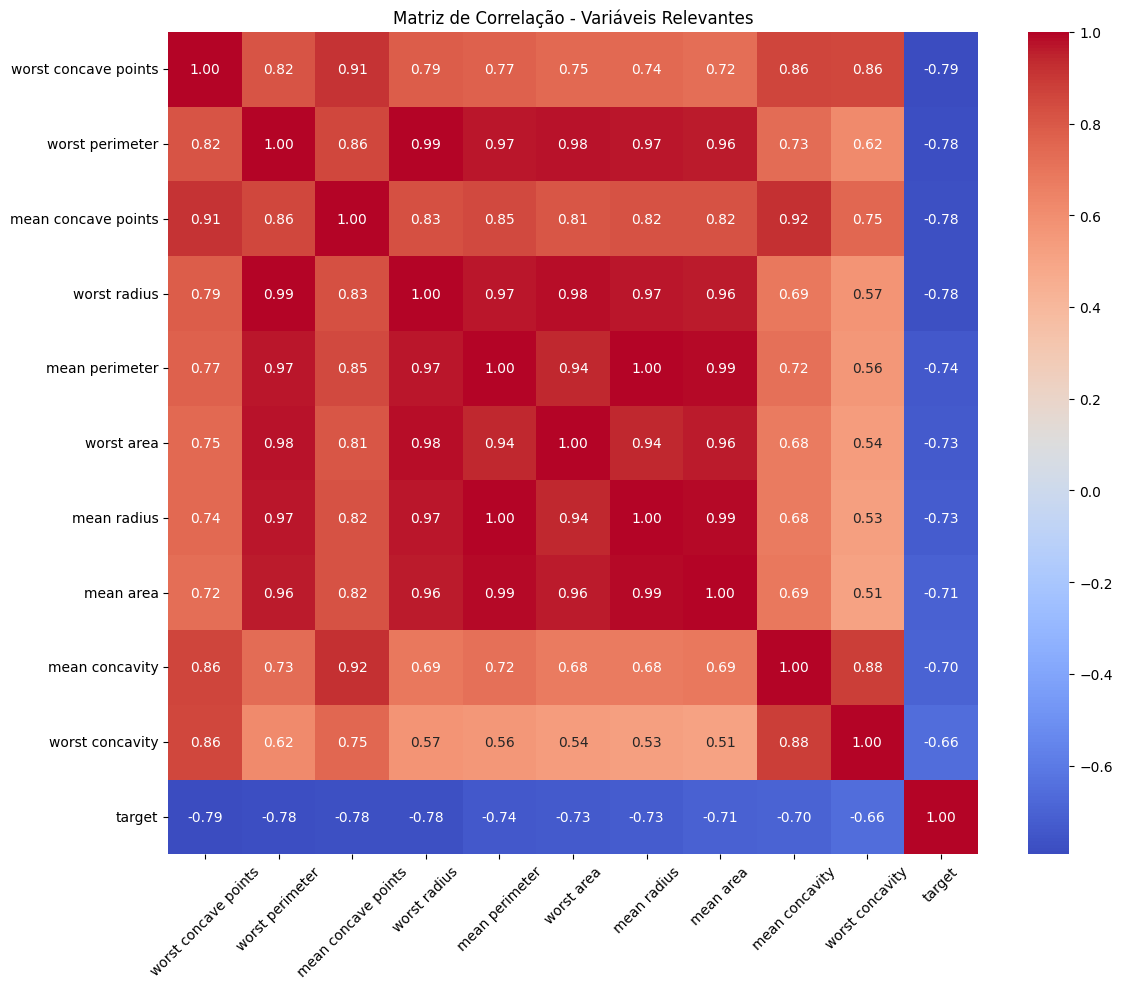

In [6]:

# Selecionar apenas as 10 melhores variáveis com base na análise fornecida
melhores_variaveis = [
    'worst concave points',
    'worst perimeter',
    'mean concave points',
    'worst radius',
    'mean perimeter',
    'worst area',
    'mean radius',
    'mean area',
    'mean concavity',
    'worst concavity'
]

# Adicionar a variável target para a correlação
df_relevante = df[melhores_variaveis + ['target']]

# Plotar a nova matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(df_relevante.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação - Variáveis Relevantes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [7]:
# === PARÂMETROS ===
random_seed = 42
center_stat = 'mean'  # média como estatística central para ranking (já usada previamente)
k_min = 1
k_max = 11
ks = list(range(k_min, k_max + 2, 2))  # valores ímpares de K
distance_metric = 'euclidean'
weights = 'distance'  # pesos baseados na distância
metric='manhattan'
palette = ['limegreen', 'indianred']  # benigno e maligno

In [11]:

# === CARREGAR O DATASET ===
dados = load_breast_cancer()
df = pd.DataFrame(dados.data, columns=dados.feature_names)
df['target'] = dados.target
df['diagnostico'] = df['target'].map({0: 'maligno', 1: 'benigno'})

# === DEFINIR AS MELHORES FEATURES MANUALMENTE OU POR RANKING (prévia análise) ===
x_cols_sorted = [
    'worst concave points',
    'worst perimeter',
    'mean concave points',
    'worst radius',
    'mean perimeter',
    'worst area',
    'mean radius',
    'mean area',
    'mean concavity',
    'worst concavity'
]


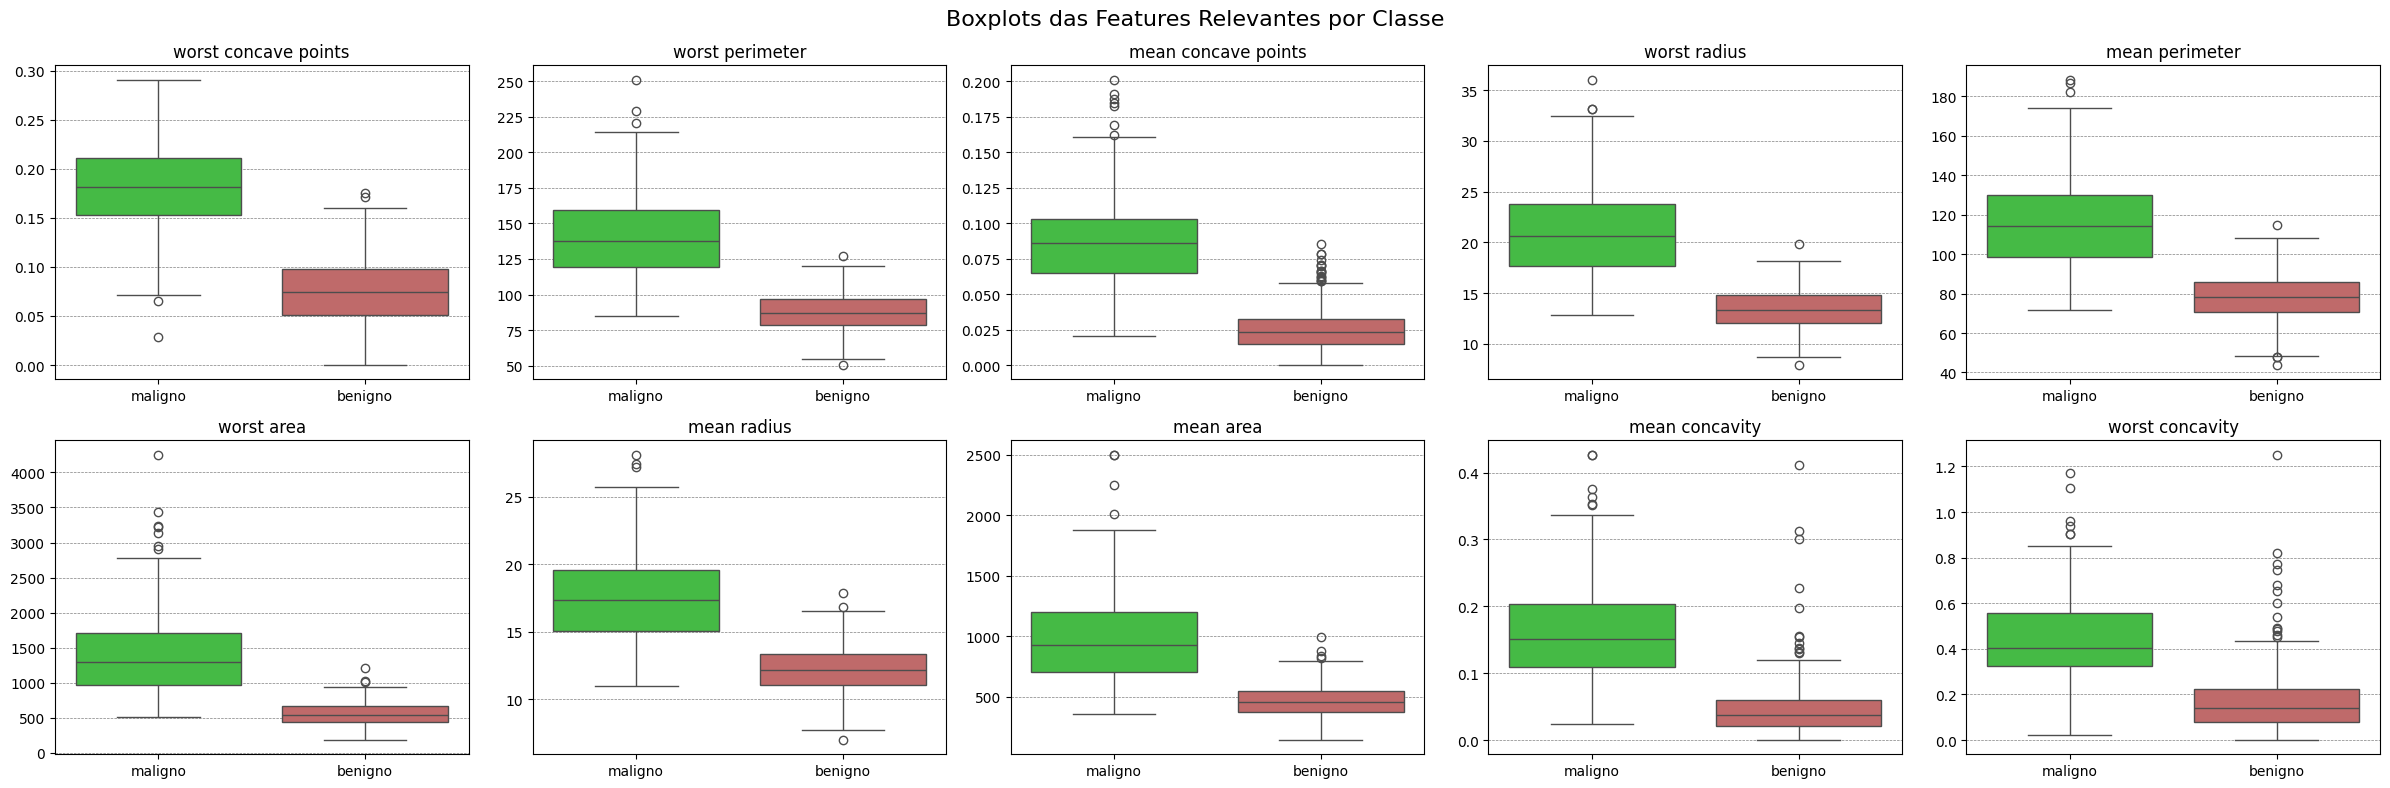

In [12]:
fig, axs = plt.subplots(2, 5, figsize=(24, 8))
for i, ax in enumerate(axs.flatten()):
    sns.boxplot(x='diagnostico', y=x_cols_sorted[i], hue='diagnostico', data=df, ax=ax, palette=palette, legend=False)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(x_cols_sorted[i])
    ax.grid(which='both', axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.suptitle("Boxplots das Features Relevantes por Classe", fontsize=16)
plt.tight_layout()
plt.show()


In [13]:
# === 1. Carregar o dataset ===
df = pd.DataFrame(dados.data, columns=dados.feature_names)
df['target'] = dados.target
df['diagnostico'] = df['target'].map({0: 'Maligno', 1: 'Benigno'})

# === 2. Selecionar top 10 variáveis com SelectKBest ===
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(columns=['target', 'diagnostico'])
y = df['target'].values

k_best = SelectKBest(score_func=f_classif, k=10)
k_best.fit(X, y)
x_cols_sorted = list(pd.Series(k_best.scores_, index=X.columns)
                     .sort_values(ascending=False).head(10).index)

# === 3. Escalar dados reais ===
X_real = df[x_cols_sorted].values
scaler_real = StandardScaler()
X_real_scaled = scaler_real.fit_transform(X_real)

# === 4. Gerar dados sintéticos ===
X_synthetic, y_synthetic = make_classification(
    n_samples=200,
    n_features=X_real.shape[1],
    n_informative=10,
    n_redundant=0,
    n_clusters_per_class=2,
    weights=[0.4, 0.6],
    flip_y=0.01,
    class_sep=1.5,
    random_state=random_seed
)

# === 5. Combinar real + sintético ===
X_combined = np.vstack((X_real_scaled, X_synthetic))
y_combined = np.concatenate((y, y_synthetic))

# === 6. Reescalar conjunto total ===
scaler_total = StandardScaler()
Xs = scaler_total.fit_transform(X_combined)
y = y_combined

# === 7. Configurar LOO e início da busca ===
loo = LeaveOneOut()
n_features = len(x_cols_sorted)

np.random.seed(random_seed)
accuracy_list = []

for n_feature in range(1, n_features + 1):
    for k in ks:
        for train_index, test_index in loo.split(Xs):
            X_train, X_test = Xs[train_index][:, :n_feature], Xs[test_index][:, :n_feature]
            y_train, y_test = y[train_index], y[test_index]

            knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric, weights=weights, n_jobs=-1)
            knn.fit(X_train, y_train)

            y_pred = knn.predict(X_test)
            train_accuracy = accuracy_score(y_train, knn.predict(X_train))
            test_hit = accuracy_score(y_test, y_pred)

            accuracy_list.append({
                'f': n_feature,
                'k': k,
                'fk': f'{n_feature}_{k}',
                'accuracy': train_accuracy,
                'hit': test_hit,
                'knn': knn
            })

        print(f'Finalizado: f={n_feature}, k={k}')

# === 8. Análise dos resultados ===
df_resultados = pd.DataFrame(accuracy_list)
resumo = df_resultados.groupby('fk')[['accuracy', 'hit']].mean().sort_values(by='hit', ascending=False)

# Mostrar top resultados
print("\nTop combinações por acurácia média (LOO):")
print(resumo.head(10))


Finalizado: f=1, k=1
Finalizado: f=1, k=3
Finalizado: f=1, k=5
Finalizado: f=1, k=7
Finalizado: f=1, k=9
Finalizado: f=1, k=11
Finalizado: f=2, k=1
Finalizado: f=2, k=3
Finalizado: f=2, k=5
Finalizado: f=2, k=7
Finalizado: f=2, k=9
Finalizado: f=2, k=11
Finalizado: f=3, k=1
Finalizado: f=3, k=3
Finalizado: f=3, k=5
Finalizado: f=3, k=7
Finalizado: f=3, k=9
Finalizado: f=3, k=11
Finalizado: f=4, k=1
Finalizado: f=4, k=3
Finalizado: f=4, k=5
Finalizado: f=4, k=7
Finalizado: f=4, k=9
Finalizado: f=4, k=11
Finalizado: f=5, k=1
Finalizado: f=5, k=3
Finalizado: f=5, k=5
Finalizado: f=5, k=7
Finalizado: f=5, k=9
Finalizado: f=5, k=11
Finalizado: f=6, k=1
Finalizado: f=6, k=3
Finalizado: f=6, k=5
Finalizado: f=6, k=7
Finalizado: f=6, k=9
Finalizado: f=6, k=11
Finalizado: f=7, k=1
Finalizado: f=7, k=3
Finalizado: f=7, k=5
Finalizado: f=7, k=7
Finalizado: f=7, k=9
Finalizado: f=7, k=11
Finalizado: f=8, k=1
Finalizado: f=8, k=3
Finalizado: f=8, k=5
Finalizado: f=8, k=7
Finalizado: f=8, k=9
Finali

In [14]:

import pandas
# CONVERT TO DATAFRAME
accuracies = pandas.DataFrame(accuracy_list)

accuracies



,f,k,fk,accuracy,hit,knn
0,1,1,1_1,0.984375,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
1,1,1,1_1,0.984375,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
2,1,1,1_1,0.986979,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
3,1,1,1_1,0.986979,0.0,"KNeighborsClassifier(metric='euclidean', n_job..."
4,1,1,1_1,0.985677,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
...,...,...,...,...,...,...
46135,10,11,10_11,1.000000,0.0,"KNeighborsClassifier(metric='euclidean', n_job..."
46136,10,11,10_11,1.000000,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
46137,10,11,10_11,1.000000,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
46138,10,11,10_11,1.000000,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."


In [15]:
# Agrupar métricas por combinação feature-k
loo_estimation = df_resultados[['fk', 'hit', 'accuracy']].groupby(['fk']).agg(['mean', 'std']).reset_index()

# Renomear colunas
loo_estimation.columns = ['fk', 'hit', 'std_hit', 'accuracy', 'std_accuracy']

# Calcular intervalo de confiança (2 desvios padrão)
loo_estimation['upper'] = [min(upper, 1.0) for upper in loo_estimation['hit'] + 2 * loo_estimation['std_hit']]
loo_estimation['lower'] = [max(lower, 0.0) for lower in loo_estimation['hit'] - 2 * loo_estimation['std_hit']]

# Ordenar e identificar o "vencedor"
loo_estimation = loo_estimation.sort_values(['hit', 'lower', 'accuracy'], ascending=[False, False, False]).reset_index(drop=True)
winner = loo_estimation.loc[0, :]

# Exibir a tabela dos melhores resultados
display(loo_estimation.head(10))
print("Melhor combinação encontrada:")
print(winner)


,fk,hit,std_hit,accuracy,std_accuracy,upper,lower
0,8_3,0.959688,0.196818,1.0,0.0,1.0,0.566052
1,9_3,0.947984,0.222203,1.0,0.0,1.0,0.503578
2,10_3,0.945384,0.227378,1.0,0.0,1.0,0.490628
3,9_1,0.944083,0.229910,1.0,0.0,1.0,0.484262
4,7_3,0.944083,0.229910,1.0,0.0,1.0,0.484262
5,10_5,0.942783,0.232408,1.0,0.0,1.0,0.477966
6,10_1,0.942783,0.232408,1.0,0.0,1.0,0.477966
7,8_1,0.940182,0.237304,1.0,0.0,1.0,0.465575
8,9_5,0.940182,0.237304,1.0,0.0,1.0,0.465575
9,10_7,0.938882,0.239703,1.0,0.0,1.0,0.459475


Melhor combinação encontrada:
fk                   8_3
hit             0.959688
std_hit         0.196818
accuracy             1.0
std_accuracy         0.0
upper                1.0
lower           0.566052
Name: 0, dtype: object


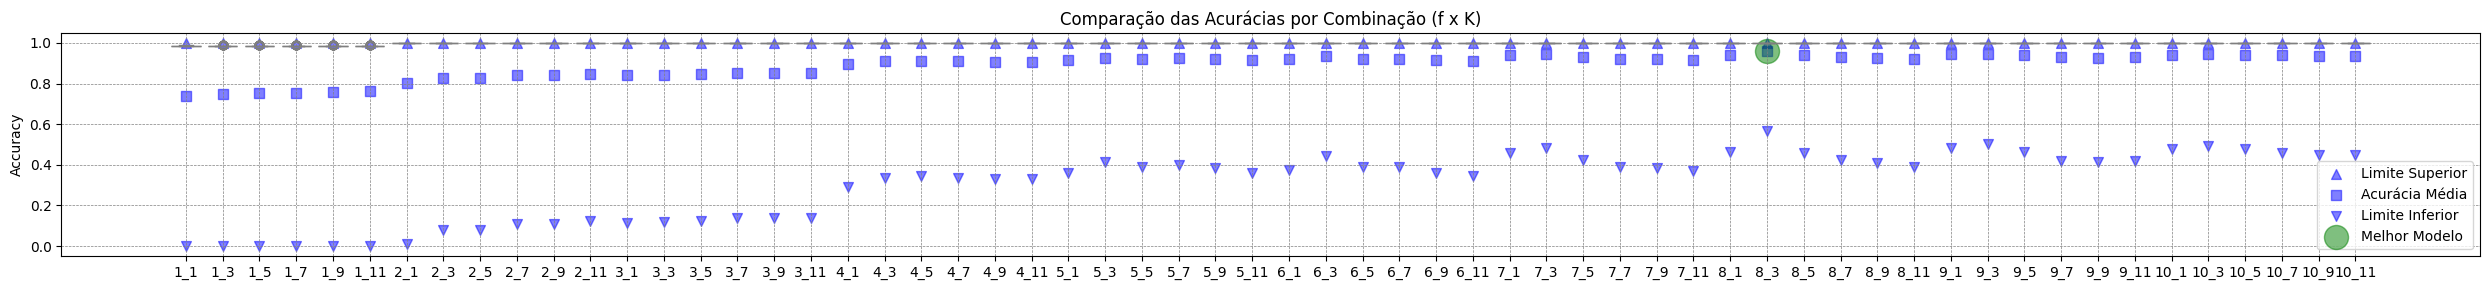

In [16]:
# Gráfico de comparação de acurácias por combinação f-k
fig = plt.figure(figsize=(25, 3))
ax = fig.add_subplot(111)

# Boxplot por combinação fk
sns.boxplot(x='fk', y='accuracy', data=df_resultados, ax=ax, color='lightgray')

# Título e eixos
ax.set_title('Comparação das Acurácias por Combinação (f x K)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('')

# Grade e anotações
ax.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

# Pontos de intervalo de confiança
ax.scatter(loo_estimation.fk, loo_estimation["upper"], color='blue', marker='^', s=50, alpha=0.5, label='Limite Superior')
ax.scatter(loo_estimation.fk, loo_estimation.hit, color='blue', marker='s', s=50, alpha=0.5, label='Acurácia Média')
ax.scatter(loo_estimation.fk, loo_estimation["lower"], color='blue', marker='v', s=50, alpha=0.5, label='Limite Inferior')

# Destacar o vencedor
ax.scatter(winner.fk, winner.hit, color='green', marker='o', s=300, alpha=0.5, label='Melhor Modelo')

ax.legend()
plt.tight_layout()
plt.show()


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

split_size = 0.2
# Recuperar melhores parâmetros
winner_f, winner_k = winner.fk.split('_')
winner_f = int(winner_f)
winner_k = int(winner_k)

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(
    Xs[:, :winner_f],
    y,
    test_size=split_size,
    random_state=random_seed
)

# Treinar o modelo final
knn = KNeighborsClassifier(
    n_neighbors=winner_k,
    metric=distance_metric,
    weights=weights,
    n_jobs=-1
)
knn.fit(X_train, y_train)

# Previsões
y_pred = knn.predict(X_test)
winner_train_accuracy = accuracy_score(y_train, knn.predict(X_train))
winner_test_accuracy = accuracy_score(y_test, y_pred)
winner_all_accuracy = accuracy_score(y, knn.predict(Xs[:, :winner_f]))

# Previsão para todos os dados
winner_y_pred = knn.predict(Xs[:, :winner_f])


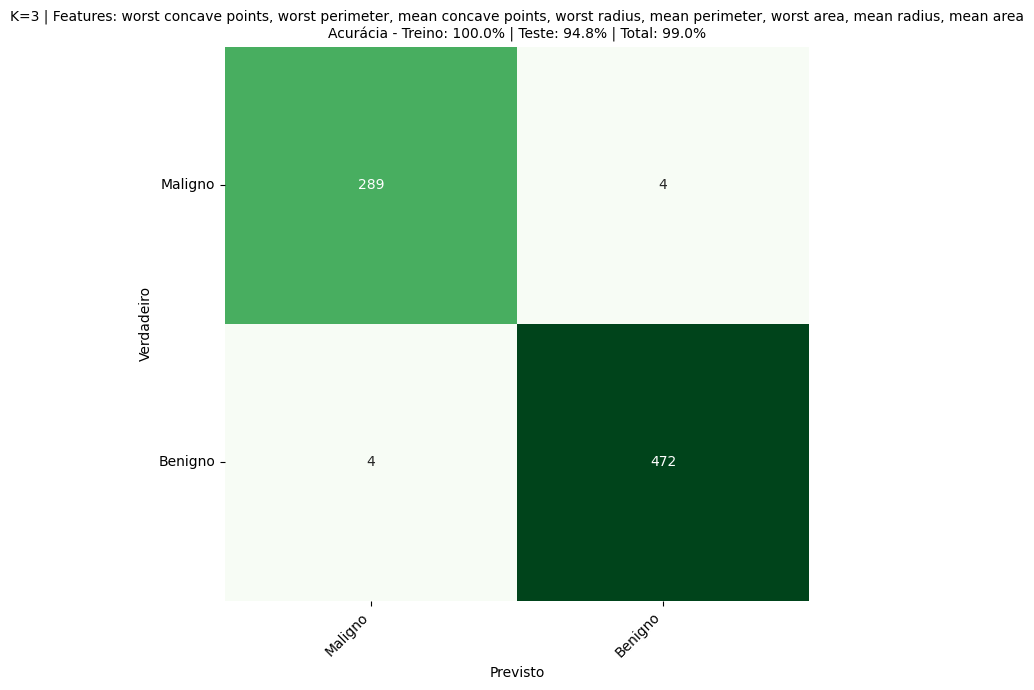

In [20]:
# Plot da matriz de confusão
fig = plt.figure(figsize=(7, 7))
conf_matrix = confusion_matrix(y, winner_y_pred)

ax = fig.add_subplot(111)
sns.heatmap(conf_matrix, annot=True, cmap='Greens', cbar=False, ax=ax, fmt='d')

# Eixos e rótulos
ax.set_xlabel('Previsto')
ax.set_ylabel('Verdadeiro')
ax.set_xticklabels(['Maligno', 'Benigno'], rotation=45, ha='right')
ax.set_yticklabels(['Maligno', 'Benigno'], rotation=0, ha='right')

# Título
best_feat_string = ', '.join(x_cols_sorted[:winner_f])
ax.set_title(
    f'K={winner_k} | Features: {best_feat_string}\n'
    f'Acurácia - Treino: {winner_train_accuracy:.1%} | Teste: {winner_test_accuracy:.1%} | Total: {winner_all_accuracy:.1%}',
    size=10
)

plt.tight_layout()
plt.show()


## Diferença entre Classificação e Regressão: Compreensão Teórica

Em problemas de **aprendizado supervisionado**, os modelos são treinados com base em exemplos rotulados, ou seja, um conjunto de entradas (variáveis preditoras) com seus respectivos rótulos (variável alvo). Dentro desse escopo, duas das tarefas mais comuns são a **classificação** e a **regressão**. Apesar de ambas se apoiarem nos mesmos fundamentos estatísticos e matemáticos, elas se diferenciam na **natureza da variável alvo** e no **tipo de problema que pretendem resolver**.

---

### Classificação

A tarefa de **classificação** consiste em prever **rótulos discretos**. O objetivo é atribuir cada exemplo de entrada a uma das **categorias predefinidas**. Ou seja, o modelo aprende a associar combinações de variáveis a classes específicas.

- **Exemplo clássico**: diagnóstico médico em que o modelo prediz se um tumor é **maligno** ou **benigno**.
- **Natureza da saída**: categórica (ex.: `0` ou `1`, `"sim"` ou `"não"`, `"baixa"`, `"média"`, `"alta"`).
- **Métricas comuns**:
  - Acurácia
  - Matriz de confusão
  - Precisão, revocação e F1-score
- **Algoritmos comuns**:
  - K-Nearest Neighbors (KNN)
  - Decision Trees, Random Forests
  - Support Vector Machines (SVM)
  - Redes neurais para classificação

---

### Regressão

A tarefa de **regressão** visa prever **valores contínuos**. O modelo é treinado para identificar uma função matemática que relacione as variáveis de entrada a um **valor numérico real**.

- **Exemplo clássico**: prever o valor de uma casa com base em número de quartos, área, localização etc.
- **Natureza da saída**: contínua (ex.: `23.5`, `1.77`, `158.3`)
- **Métricas comuns**:
  - R² (Coeficiente de determinação)
  - Erro quadrático médio (MSE)
  - Erro absoluto médio (MAE)
- **Algoritmos comuns**:
  - Regressão Linear
  - Regressão Ridge/Lasso
  - Árvores de Regressão
  - Redes neurais para regressão

---

### Resumo Comparativo

| Característica        | Classificação                  | Regressão                       |
|------------------------|--------------------------------|---------------------------------|
| Tipo de saída          | Categórica (discreta)          | Numérica (contínua)             |
| Objetivo               | Prever rótulo/classe           | Prever valor numérico           |
| Exemplo de saída       | `"Maligno"`, `1`, `"Aprovado"` | `23.7`, `152.4`, `0.65`         |
| Avaliação              | Acurácia, F1-score             | R², MSE, MAE                    |
| Exemplo de algoritmo   | KNN, SVM, Árvores              | Regressão Linear, Ridge         |

---

### Considerações Finais

A principal distinção entre classificação e regressão reside, portanto, no **formato da variável dependente (alvo)**. Enquanto a classificação lida com **etiquetas discretas**, a regressão busca modelar **relações numéricas contínuas**. Entender essa diferença é fundamental para a escolha do modelo, dos dados de entrada e das métricas de avaliação adequadas.

